In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('Hackathon_Working_Data.csv')

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB
None


In [27]:
print(df.head())

  MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0    M1        N1    4    T375     225.0  1.0  225.0  225.0   
1    M1        N1    4    T379      95.0  1.0   95.0   95.0   
2    M1        N1    4    T381      10.0  1.0   10.0   10.0   
3    M1        N1    4    T382     108.0  1.0  108.0  108.0   
4    M1        N1    4    T384      19.0  1.0   19.0   19.0   

                       GRP                     SGRP                    SSGRP  \
0     BUTTER MARGR  (4/94)                   BUTTER                   SALTED   
1  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                CHOCOLATE         CHOCOLATE PANNED         CHOCOLATE PANNED   
3             PACKAGED TEA               MAIN PACKS               MAIN PACKS   
4         ALL IODISED SALT            POWDERED SALT            POWDERED SALT   

                      CMP           MBRD                 BRD  
0               G C M M F           AMUL                AMUL  
1             

In [28]:
print(df.columns)

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')


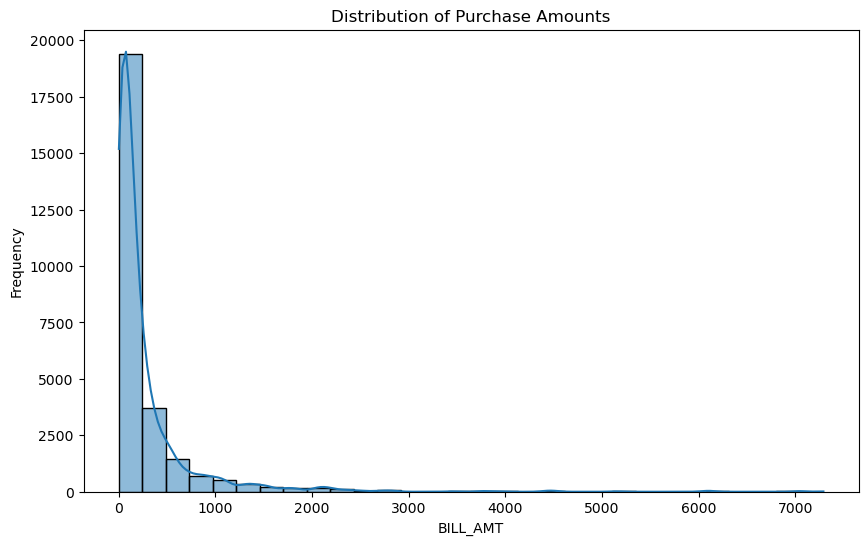

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BILL_AMT'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('BILL_AMT')
plt.ylabel('Frequency')
plt.show()

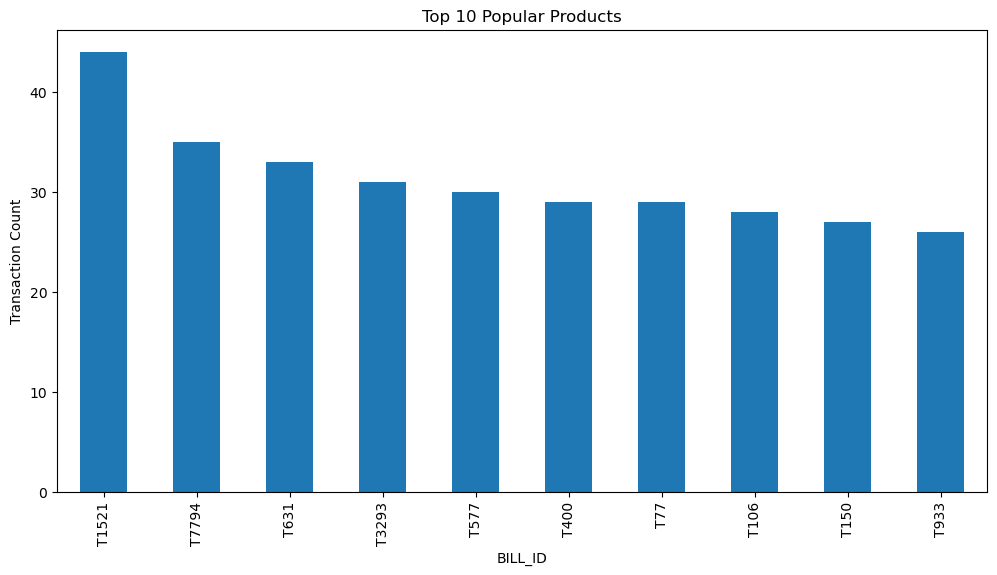

In [30]:
popular_products = df['BILL_ID'].value_counts().head(10)
plt.figure(figsize=(12, 6))
popular_products.plot(kind='bar')
plt.title('Top 10 Popular Products')
plt.xlabel('BILL_ID')
plt.ylabel('Transaction Count')
plt.show()

In [31]:
df['DAY'] = pd.to_datetime(df['DAY'])
df['MONTH'] = df['DAY'].dt.to_period('M')
monthly_purchases = df.groupby('MONTH')['BILL_ID'].count()

C:\Users\Shaista Firdose\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


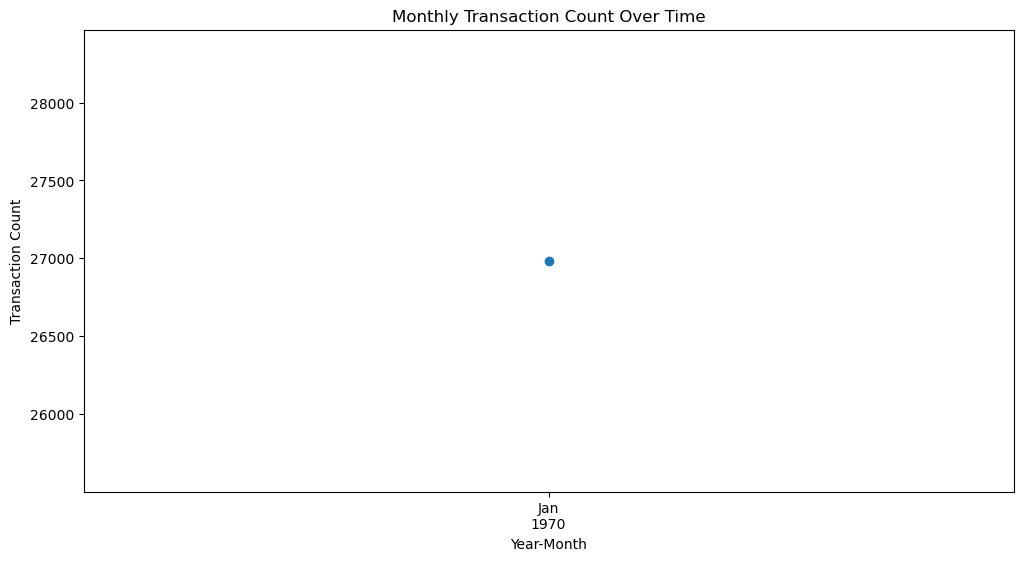

In [32]:
plt.figure(figsize=(12, 6))
monthly_purchases.plot(kind='line', marker='o')
plt.title('Monthly Transaction Count Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.show()

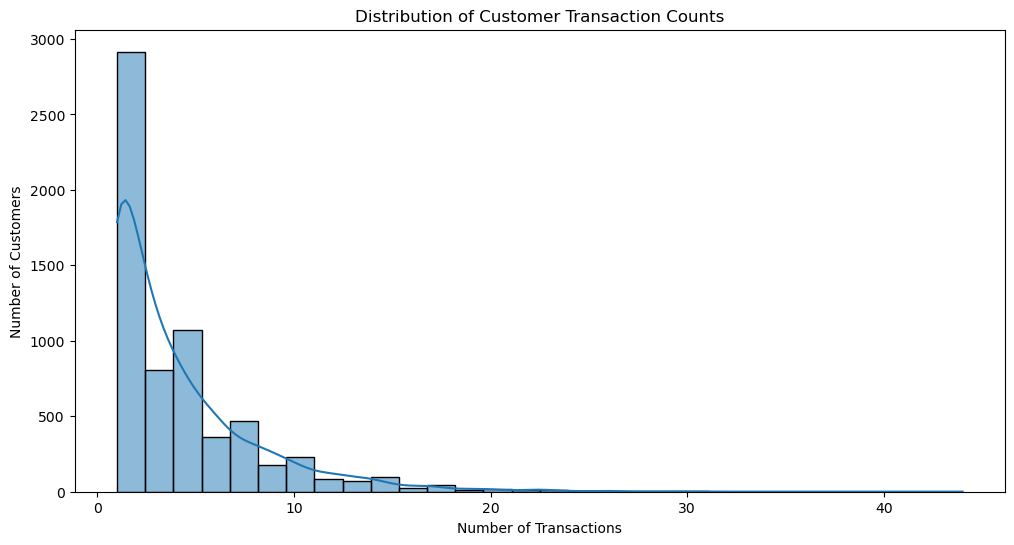

In [33]:
# Explore customer behavior based on transaction frequency
customer_transaction_counts = df['BILL_ID'].value_counts()
plt.figure(figsize=(12, 6))
sns.histplot(customer_transaction_counts, bins=30, kde=True)
plt.title('Distribution of Customer Transaction Counts')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

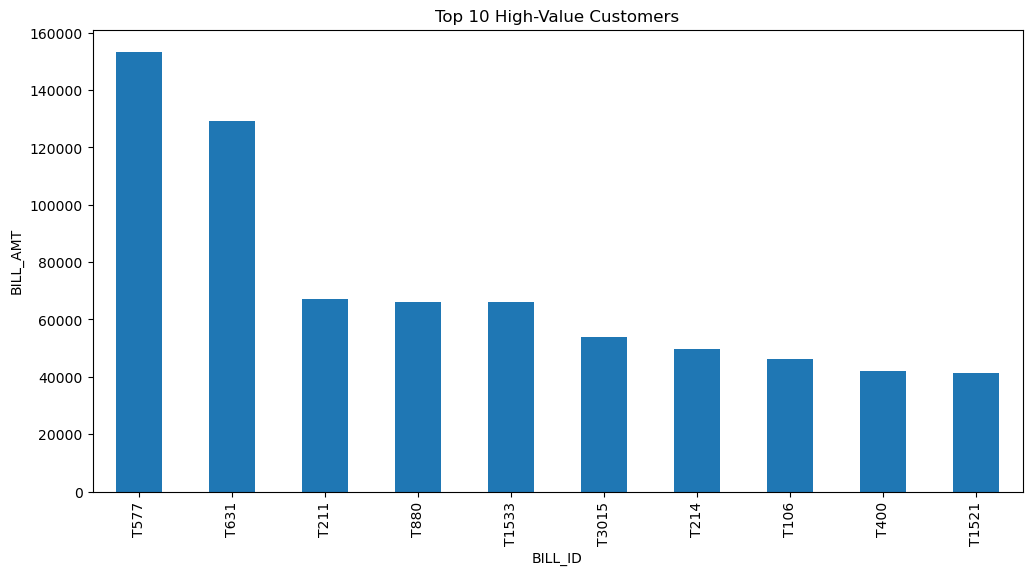

In [34]:
# Identify high-value customers
customer_total_purchase = df.groupby('BILL_ID')['BILL_AMT'].sum()
high_value_customers = customer_total_purchase.nlargest(10)

plt.figure(figsize=(12, 6))
high_value_customers.plot(kind='bar')
plt.title('Top 10 High-Value Customers')
plt.xlabel('BILL_ID')
plt.ylabel('BILL_AMT')
plt.show()